In [55]:
import torch
import numpy as np
import os
import imageio
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch import nn
from tqdm import tqdm

import dataset
import rendering
from model import Voxels

Instead of sphere with few parameters we'll have voxels with way more parameters.
our sphere model isnt complex enough to fit to enough scenes

Therefore we'll move to voxels to represent more scenes, and finally we'll move to Neural Networks that can represent even more complex scenes


## 1. Camera / Dataset

- Instrinsic: intrinsic paramters eg. the camera parameters the orientation, focal length etc.
for NeRF we make sure the intrinsic parameters like focal length are the same for input image while the position is changing overtime.

- do not use autofocus on your phone use the same focal length for all images.
- most nerf code assumes that intrinsic params between input images remain the same

In [2]:
BATCH_SIZE = 1024
origin, direction, target_px_values = dataset.get_rays('fox/fox',mode='train')

dataloader = DataLoader(torch.cat((torch.from_numpy(origin),
                                   torch.from_numpy(direction),
                                   torch.from_numpy(target_px_values)), dim=1),
                        batch_size=BATCH_SIZE, shuffle=True)

test_origin, test_direction, test_target_px_values = dataset.get_rays('fox/fox/', mode='test')


print(f"origin shape: {origin.shape}")
print(f"direction shape: {direction.shape}")
print(f"target_px_values shape: {target_px_values.shape}")
print(f"test_origin shape: {test_origin.shape}")
print(f"test_direction shape: {test_direction.shape}")
print(f"test_target_px_values shape: {test_target_px_values.shape}")

Mode: train
Image files length: 90
Pose files length: 90
Intrinsic files length: 90
Image size: (400, 400, 4)
(90, 400, 400, 4)
Mode: test
Image files length: 10
Pose files length: 10
Intrinsic files length: 10
Image size: (400, 400, 4)
(10, 400, 400, 4)
origin shape: (90, 160000, 3)
direction shape: (90, 160000, 3)
target_px_values shape: (90, 160000, 3)
test_origin shape: (10, 160000, 3)
test_direction shape: (10, 160000, 3)
test_target_px_values shape: (10, 160000, 3)


## 2. Rendering

## 3. Model

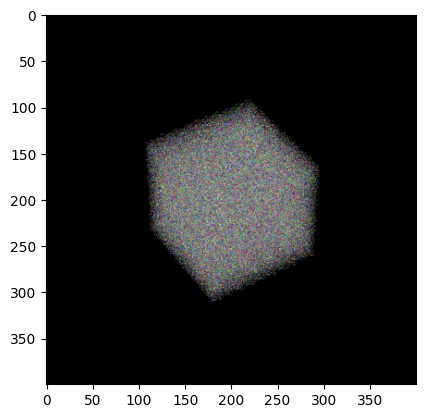

In [51]:
model = Voxels(scale=1)
img = rendering.rendering(model, origin[0], direction[0], 8, 12)
plt.imshow(img.reshape(400,400,3).data.cpu().numpy())

In [57]:
for params in model.parameters():
    print(params)

Parameter containing:
tensor([[[[5.4936e-01, 2.0529e-01, 1.3168e-01, 1.9234e-01],
          [9.5475e-01, 1.0254e-01, 3.9908e-01, 1.6685e-01],
          [7.0562e-01, 6.4039e-01, 5.5587e-01, 2.8447e-01],
          ...,
          [4.6612e-01, 4.1602e-01, 1.8722e-01, 8.0755e-02],
          [8.8291e-01, 3.3009e-01, 3.6504e-01, 2.9188e-02],
          [2.0283e-02, 6.1257e-01, 4.1724e-01, 5.8403e-01]],

         [[9.0029e-01, 7.9693e-01, 4.1312e-01, 8.2506e-02],
          [2.7069e-01, 6.4288e-02, 6.5547e-01, 3.1017e-01],
          [4.6751e-01, 4.2265e-01, 2.3285e-01, 3.6281e-01],
          ...,
          [3.5319e-01, 5.5577e-01, 8.1813e-01, 1.2670e-02],
          [2.1027e-01, 5.1684e-01, 8.2130e-01, 1.0623e-01],
          [8.9803e-01, 3.0605e-01, 2.4515e-01, 7.8589e-01]],

         [[5.5216e-01, 6.2399e-01, 5.9064e-01, 8.5671e-01],
          [7.4345e-01, 4.4115e-01, 6.6752e-01, 8.9755e-01],
          [1.7763e-01, 1.0058e-01, 1.9084e-01, 6.6674e-01],
          ...,
          [3.6056e-01, 5.4926

## 4. Training

In [ ]:
def training(model, optimizer, scheduler, tn, tf, nb_bins, nb_epochs, device= 'cpu'):
    for epoch in tdqm(range(nb_epoch))